# get ready

In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set the Seaborn style to darkid
sns.set_theme(style='darkgrid')

# Check ID

In [ ]:
def check_id(df):

  id_names = [col for col in df if 'id' in col.lower() ] # list of columns have 'id' in its name

  id = [col for col in df if df[col].nunique() == df.shape[0]] # list of all columns has unique values == number of all df rows

  if len(id) == 1 :                                            # if there is one column so it must be the index
    #df.set_index(id[0], inplace=True)                          # set the column as index
    df.drop(columns=id[0], inplace=True)   # drop the 'id' column because it makes plot so bad
    return df
  elif len(id) > 1 : # if we have more than one column in id list
    sub_id = [col for col in id if col in id_names]  # check if any of these columns have "id" in its name
    if len(sub_id) == 1 :  # check if sub_id have only one column
      df.drop(columns=sub_id[0], inplace=True)   # drop the 'id' column because it makes plot so bad
      return df
  else:
    return df

# check high nulls

In [ ]:
# check number of nulls
def check_nulls(df):
  """
  1. function takes data frame
  2. drop the column has more than 50% nulls
  3. return data frame
  """
  df = check_id(df) # check if there ara an id column in df

  # list of some possible string values can be found insted of 'nulls'
  missing_str = ['miss','not found','unknown','NA','unspecified','other','N/A','invalid','none','null','empty','@','/','$','%','&','?','!','~','|','\\','< >','[]']
  df.replace(missing_str, np.nan, inplace=True) # replace any noise value in df by 'NAN'

  c=0 # counter for all columns
  n=0 # counter for only column will be droped

  for col in df: #  loop foe each col in df

    c+=1 # increment the columns counter
    if df[col].isna().sum()/len(df) > 0.5 : # check if column has more than 50% nulls
      df.drop(columns=col, inplace=True) # drop the column has more than 50% nulls
      n+=1  # increment the droped counter

  return df # return df after drop column with more than 50% nulls

# clean Data

In [ ]:
# function handle nulls & convert types
def clean_data(df):
  '''
  1. function takes data frame
  2. create list of any column types not [int , float, bool]
  3. check the values type inside each column
  4. handle missing values according to values type
  5. convert column type to a suitable type
  6. return data frame
  '''
  df = check_nulls(df) # drop any column has more than 50% nulls

  obj_col = [col for col in df if df[col].dtype not in [int , float, bool]] # create list of any column types not [int , float, bool]

  for col in df: # loop on each col in df
    if col in obj_col : # if col type not [int, float, bool]
        t=[] # empty list to store some types of each single value int the column

        for i in range(25): # loop on from 0 to 24
          if not pd.isnull(df[col][i]): # check the first 25 value in each column if not null
            t.append(type(df[col][i])) # if the value is not null , appent it's type in `t` list

        if st.mode(t) == str: # check on the mode of `t` list if is 'str', then the column should be 'object'
          # convert the 'sting values' iside column to lower case
          df[col] = df[col].str.lower() # make sure that all values in the same shape
          df[col] = df[col].fillna(df[col].mode()[0]) # fill nulls in this column with the mode of the column

        elif st.mode(t) == bool: # check the mode of `t` if bool
          df[col] = df[col].fillna(df[col].mode()[0]) # fill nulls with the mode
          df[col] = df[col].astype(int) # convert the column to int , (1 for Ture and 0 for False)

        elif (st.mode(t) == float) or (st.mode(t) == int): # if the mode of `t` is numeric
          df[col] = pd.to_numeric(df[col], errors='coerce') # convert it to numeric, and replace any value(/,+,@) cann't converted to NAN
          df[col] = df[col].fillna(df[col].mean()) # fill nulls with the mean of the column

    elif df[col].dtype == bool : # check if column type is bool
      df[col] = df[col].fillna(df[col].mode()[0]) # fill nulls with the mode
      df[col] = df[col].astype(int) # convert the column to int , (1 for Ture and 0 for False)

    else: # if not in obj_col or not bool , it must be [int , float]
      df[col] = pd.to_numeric(df[col], errors='coerce')  # convert it to numeric, and replace any value(/,+,@) cann't converted to NAN
      df[col] = df[col].fillna(df[col].mean()) # fill nulls with the mean of the column

  return df

In [ ]:
print(clean_data.__doc__)


  1. function takes data frame
  2. create list of any column types not [int , float, bool]
  3. check the values type inside each column
  4. handle missing values according to values type
  5. convert column type to a suitable type
  6. return data frame
  


In [ ]:
#df = clean_data(df)

In [ ]:
#df.info()

# Split Columns Types

In [ ]:
def split_type(df):

  '''
  cat_list = [ col for col in obj_list if df[col].nunique() <= 15  ] # list with categorical column have <= 15 class
  conti_cat_list = [col for col in df if df[col].dtype in [int,float] and df[col].nunique() <= 15 ] # categorical columns from numerical columns
  cat_list += conti_cat_list # add conti_cat_list to cat_list
  '''


  obj_list = []    # create list of non numerical columns (and) any column with number of unique <=15
  for col in df.columns:
      if df[col].dtype not in [int,float] or df[col].nunique() <= 15:
          obj_list.append(col)

  cat_list = [ col for col in obj_list if df[col].nunique() <= 15  ] # list of column with only number of unique <=15

  conti_list = [ col for col in df if df[col].dtype in [int,float] and col not in cat_list ] # list of numerical continuous columns

  hue_cat = [ col for col in cat_list if df[col].nunique() < 4 ]  # list of categorical column have < 4 class (for hue in plots)

  other_list = [ col for col in df if col not in cat_list and col not in conti_list and col not in hue_cat] # other columns not in [cat_list, conti_list, hue_cat ]

  return cat_list, conti_list, hue_cat , other_list

# Prepare Plots 1

## Boxen Plot

In [ ]:
def boxen_plot(df, col, axs=None):
  # Plot the boxenplot
  ax = sns.boxenplot(data=df[col], color='steelblue', saturation=0.8, linewidth=1.5, ax=axs)

  # Set plot title and labels
  ax.set_title(f"{col} Boxen Plot".title(), fontsize=14)
  ax.set_xlabel(f"{col}", fontsize=12)
  ax.set_ylabel("Values", fontsize=12)

  # Customize the x-axis tick labels
  ax.set_xticklabels(['A'], fontsize=10)  # Only one label as there is only one data point

  # display grid
  ax.yaxis.grid(True)

  # Calculate Q1 and Q3 using numpy
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)

  # Add a horizontal line at the median
  ax.axhline(y=q1, color='b', linestyle='-', linewidth=2)
  ax.axhline(y=df[col].median(), color='green', linestyle='-', linewidth=3)
  ax.axhline(y=df[col].mean(), color='r', linestyle='--', linewidth=1.2)
  ax.axhline(y=q3, color='orange', linestyle='-', linewidth=2)

  # Add a legend
  q1_legend = plt.Line2D([], [], color='b', linestyle='-', linewidth=1.2, label='Q1')
  median_legend = plt.Line2D([], [], color='green', linestyle='-', linewidth=1.2, label='Median')
  mean_legend = plt.Line2D([], [], color='r', linestyle='--', markersize=5, label='Mean')
  q2_legend = plt.Line2D([], [], color='orange', linestyle='-', linewidth=1.2, label='Q2')



  # Add a legend with custom labels and customize font size and legend size
  legend = ax.legend(handles=[q1_legend, median_legend, mean_legend, q2_legend], loc='upper right',fontsize=8)
  legend.get_title().set_fontsize(9)
  legend.get_frame().set_linewidth(0.5)

  # Show the plot
  #plt.show()

## Strip Plot

In [ ]:
def strip_plot(df, colx,coly,hue=None, axs=None):

  palette=None
  if hue:
    palette='tab10'
    # Create a strip plot with custom point appearance
    ax = sns.stripplot(data=df, x=colx, y=coly, hue=hue, dodge=True , palette=palette, linewidth=0.5, edgecolor='black', ax=axs)

    # Add a legend with custom labels and customize font size and legend size
    ax.set_title(f'{colx} vs {coly} group by  {hue}'.title())
    legend = axs.legend(title=f'{hue}'.title(), loc=(-0.1, 0.9), fontsize=8)
    legend.get_title().set_fontsize(9)
    legend.get_frame().set_linewidth(0.5)

  else:
    # Create a strip plot with custom point appearance
    ax = sns.stripplot(data=df, x=colx, y=coly, linewidth=0.5, edgecolor='black', ax=axs)

    ax.set_title(f'{colx} vs {coly}'.title())


  # Show the plot
  #plt.show()

## Pie Plot

In [ ]:
def pie_plot(df, col, ax=None):

    # Calculate value counts
    value_counts = df[col].value_counts().sort_values(ascending=False)

    # Set the explode of the first and biggest sector
    explode = [0] * len(value_counts)
    explode[0] = 0.07

    # Set edge properties
    edge_props = {'linewidth': 2, 'edgecolor': 'white'}

    # Create pie plot
    ax.pie(value_counts, labels=value_counts.index, explode=explode, shadow=True,
           wedgeprops=edge_props, autopct='%1.1f%%')

    # Set aspect ratio to make it a circle
    ax.axis('equal')

    # Add a title
    ax.set_title(f'{col} Distribution'.title())

    # Create custom legend labels with ratios
    legend_labels = [f'{label} : {round((count / value_counts.sum()) * 100, 2)} %'
                     for label, count in zip(list(value_counts.index), list(value_counts))]


    # Add a legend with custom labels and customize font size and legend size
    legend = ax.legend(legend_labels, title='Class : Ratio', loc=(0, 0), fontsize=8)
    legend.get_title().set_fontsize(9)
    legend.get_frame().set_linewidth(0.5)


## count Plot

In [ ]:
def count_plot(df, col, axs=None):
    # Create countplot
    ax = sns.countplot(y=df[col], data=df, palette='hot', ax=axs)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}\n', (p.get_width(), p.get_y()+0.5), ha='left', va='center', color='black', size=9)

    # Set plot title and labels
    ax.set_title(f'{col} Distribution'.title())
    ax.set_xlabel('Count')
    ax.set_ylabel(f'{col}')


    # Show the plot
    #plt.show()


## Bar Plot

In [ ]:
def bar_plot(df, colx,coly,colh=None, axs=None):

  palette='hot' if colh else None

  # Create barplot with hue and dodge
  ax = sns.barplot(x=colx, y=coly, hue=colh,palette=palette, dodge=True, data=df, ax=axs)

  # Set plot title and labels
  ax.set_xlabel(f'{colx}')
  ax.set_ylabel(f'{coly}')

  # Add a legend with custom labels and customize font size and legend size
  if colh:
    ax.set_title(f'{colx} vs {coly} group by  {colh}'.title())
    legend = ax.legend(title=f'{colh}'.title(), loc=(0.9, 0.8), fontsize=8)
    legend.get_title().set_fontsize(9)
    legend.get_frame().set_linewidth(0.5)
  else:
    ax.set_title(f'{colx} vs {coly}')

## Violin Plot

In [ ]:
def violin_plot(df, colx,coly,colh=None,axs=None):
    palette='hot' if colh else None

    ax=sns.violinplot(x=colx, y=coly, hue=colh,data=df, palette=palette, ax=axs)

    # Set plot title and labels
    ax.set_xlabel(f'{colx}')
    ax.set_ylabel(f'{coly}')

    # Add a legend with custom labels and customize font size and legend size
    if colh:
      ax.set_title(f'{colx} vs {coly} group by  {colh}'.title())
      legend = ax.legend(title=f'{colh}'.title(), loc=(0.9, 0.8), fontsize=8)
      legend.get_title().set_fontsize(9)
      legend.get_frame().set_linewidth(0.5)
    else:
      ax.set_title(f'{colx} vs {coly}')

## Box Plot

In [ ]:
def box_plot(df, colx, coly, colh=None, axs=None):

    palette= 'tab10' if colh else None

    ax= sns.boxplot(x=colx, y=coly, hue=colh, palette=palette, data=df, ax=axs)

    # Set plot title and labels
    ax.set_xlabel(f'{colx}')
    ax.set_ylabel(f'{coly}')

    # Add a legend with custom labels and customize font size and legend size
    if colh:
      ax.set_title(f'{colx} vs {coly} group by {colh}'.title())
      legend = ax.legend(title=f'{colh}'.title(), loc=(0.87, 0.8), fontsize=8)
      legend.get_title().set_fontsize(9)
      legend.get_frame().set_linewidth(0.5)
    else:
      if colx :
       ax.set_title(f'{colx} vs {coly}'.title())
      else :
        ax.axhline(df[coly].mean(), color='red', linestyle='dashed', linewidth=2)
        mean_legend = plt.Line2D([], [], color='r', linestyle='--', markersize=5, label='Mean')
        legend = ax.legend(handles=[mean_legend], loc='upper right',fontsize=8)
        ax.set_title(f'{coly} Box Plot'.title())
        ax.set_ylabel("Years")
        ax.set_xlabel(f"{coly}".title())

# Prepare Plots 2

## Scatter Plot

In [ ]:
def scatter_plot(df, colx, coly, hue=None, style=None, axs=None):

  pallet= 'tab10' if hue else None

  # Create scatter plot
  ax = sns.scatterplot(data=df, x=colx, y=coly, hue=hue, style=style, palette=pallet, ax=axs)

  # Set plot title and labels
  ax.set_xlabel(f"{colx}", fontsize=12)
  ax.set_ylabel(f"{coly}", fontsize=12)


  # Add a grid
  ax.grid(True, linestyle='--', linewidth=0.5)

  # Add a legend with custom labels and customize font size and legend size
  if hue:
    ax.set_title(f'{colx} vs {coly} group by {hue}'.title())
    legend = ax.legend(title=f'{hue}'.title(), loc=(0.8, 0.28), fontsize=8)
    legend.get_title().set_fontsize(9)
    legend.get_frame().set_linewidth(0.5)
    if style:
      ax.set_title(f'{colx} vs {coly} group by  {hue} & {style}'.title())
  else:
    ax.set_title(f'{colx} vs {coly}'.title())


## histogram Plot

In [ ]:
def hist_plot(df, col, axs=None):

  # calc number of bins
  n = int(np.ceil(df.shape[0]**0.5))
  # Create histogram
  ax = sns.histplot(df[col], bins=n, kde=True, color='#5614b3', line_kws={'linewidth': 2}, ax=axs)
  ax.lines[0].set_color('crimson') # Kde color

  # Add labels and title
  ax.set_xlabel(f'{col}')
  ax.set_ylabel('Frequency')
  ax.set_title(f'{col} Histogram'.title())


## Line Plot

In [ ]:
def line_plot(df, colx, coly, axs=None):

  # Create the line plot
  ax= sns.lineplot(data=df, x=colx, y=coly, color='blue', marker='o', markersize=4, markeredgecolor='red', markerfacecolor='yellow', ax=axs)

  # add title and legend
  ax.set_title(f'{colx} & {coly} Line Plot '.title())
  ax.grid(True)
  ax.legend(['Data'], loc='upper left')


## Joint Plot

In [ ]:
def joint_plot(df, colx, coly, colh=None, axs=None):

  pallet= "Set2" if colh else None

  # Plot jointplot with customized marginal plot
  ax = sns.jointplot(x=colx, y=coly, data=df, kind="scatter", joint_kws={"color": "green"},marginal_kws={"color": "red"},
              height=7, ratio=3, space=0.2, marginal_ticks=True, hue=colh, palette=pallet, ax=axs)


  # Add a legend with custom labels and customize font size and legend size
  if colh:
    ax.ax_joint.set_title(f'{colx} vs {coly} by Class {colh}'.title())
    legend = ax.ax_joint.legend(title=f'{colh}'.title(), loc=(0.78, 0.88), fontsize=8)
    legend.get_title().set_fontsize(9)
    legend.get_frame().set_linewidth(0.5)
  else:
    ax.ax_joint.set_title(f'{colx} vs {coly}'.title())

## Heatmap

In [ ]:
def heat_map(df, axs=None):
  corr = df.corr(numeric_only=True)
  ax = sns.heatmap(corr, annot=True,  annot_kws={'size': 8}, fmt='.2', ax=axs)

  # Set plot title and labels
  ax.set_title('Heatmap')

  # Set font size of column names
  ax.tick_params(labelsize=9)

# All Categorical Plots in one Figure

In [ ]:
def cat_plot(df, colx,coly,colh=None):
  # Create a figure and subplots
  fig, axes = plt.subplots(3, 3, figsize=(16, 10))

  # Adjust the spacing between subplots
  plt.subplots_adjust(hspace=0.5, wspace=0.3)

  # *********************************************************
  # ************ Plot on the subplots (First Row) ***********
  # *********************************************************

  pie_plot(df, colx, axes[0, 0])
  count_plot(df, colx, axs=axes[0,1])

  rand_col = random.choice(coly) # Choose a random column from the conti_list
  strip_plot(df, colx, rand_col, axs=axes[0, 2])

    # *********************************************************
    # ************ Plot on the subplots (Second Row) ***********
    # *********************************************************

  if len(colh)>1:
    rand_col = random.choice(coly) # Choose a random column from the conti_list
    h_col = random.choice([col for col in colh if col != rand_col and col != colx]) # Choose a random column from the colh exclude rand_col
    bar_plot(df, colx, rand_col, h_col, axs=axes[1,0])

    rand_col = random.choice(coly) # Choose a random column from the conti_list
    h_col = random.choice([col for col in colh if col != rand_col and col != colx]) # Choose a random column from the colh exclude rand_col
    strip_plot(df, colx, rand_col, h_col, axs=axes[1, 1])

    rand_col = random.choice(coly) # Choose a random column from the conti_list
    h_col = random.choice([col for col in colh if col != rand_col and col != colx]) # Choose a random column from the colh exclude rand_col
    violin_plot(df, colx, rand_col, h_col, axs=axes[1,2])

    # *********************************************************
    # ************ Plot on the subplots (Third Row) ***********
    # *********************************************************

    rand_col = random.choice(coly) # Choose a random column from the conti_list
    h_col = random.choice([col for col in colh if col != rand_col and col != colx])  # Choose a random column from the colh exclude rand_col
    strip_plot(df, colx, rand_col, h_col, axs=axes[2, 0])

    rand_col = random.choice(coly) # Choose a random column from the conti_list
    h_col = random.choice([col for col in colh if col != rand_col and col != colx])  # Choose a random column from the colh exclude rand_col
    box_plot(df, colx, rand_col, h_col, axs=axes[2,1])

    rand_col = random.choice(coly) # Choose a random column from the conti_list
    h_col = random.choice([col for col in colh if col != rand_col and col != colx]) # Choose a random column from the colh exclude rand_col
    bar_plot(df, colx, rand_col, h_col, axs=axes[2,2])

  # Set a big title for the entire figure
  fig.suptitle(f"{colx} analysis \n{'*'*20}".title(), fontsize=16)

  # Display the figure
  plt.show();print('\n\n')

In [ ]:
# cat_plot('pclass', conti_list, hue_cat)

# All Continuous Plots in one Figure

In [ ]:
def cont_plot(df, colx, cont_list, cat_list, colh):
  # Create a figure and subplots
  fig, axes = plt.subplots(3, 3, figsize=(16, 10))

  # Adjust the spacing between subplots
  plt.subplots_adjust(hspace=0.5, wspace=0.3)

  # *********************************************************
  # ************ Plot on the subplots (First Row) ***********
  # *********************************************************
  hist_plot(df, colx, axs=axes[0, 0])

  if len(cont_list) > 1 :
    rand_col = random.choice([col for col in cont_list if col != colx]) # Choose a random column from the conti_list
    line_plot(df, colx, rand_col, axes[0, 1])

    rand_col = random.choice([col for col in cont_list if col != colx]) # Choose a random column from the conti_list
    scatter_plot(df, colx, rand_col, axs=axes[0, 2])

  # *********************************************************
  # ************ Plot on the subplots (Second Row) ***********
  # *********************************************************

  boxen_plot(df, colx, axs=axes[1, 0])

  if len(cont_list) > 1 :
    heat_map(df, axs=axes[1, 1])


  rand_cat = random.choice(cat_list) # Choose a random column from the cat_list
  h_col = random.choice([col for col in colh if col != rand_cat]) if len(colh)>1 else colh[0] # Choose a random column from the colh exclude rand_cat
  box_plot(df, rand_cat, colx, h_col, axs=axes[1, 2])


  # *********************************************************
  # ************ Plot on the subplots (Third Row) ***********
  # *********************************************************

  if len(cont_list) > 1 and len(cat_list) > 1 :
    rand_col = random.choice([col for col in cont_list if col != colx]) # Choose a random column from the conti_list
    rand_cat = random.choice(cat_list) # Choose a random column from the cat_list
    h_col = random.choice([col for col in colh if col != rand_cat]) if len(colh)>1 else colh[0] # Choose a random column from the colh exclude rand_cat
    scatter_plot(df, colx, rand_col, rand_cat, h_col, axs=axes[2, 0])


    rand_col = random.choice([col for col in cont_list if col != colx]) # Choose a random column from the conti_list
    rand_cat = random.choice(cat_list) # Choose a random column from the cat_list
    scatter_plot(df, colx, rand_col, rand_cat, axs=axes[2, 1])

    rand_col = random.choice([col for col in cont_list if col != colx]) # Choose a random column from the conti_list
    rand_cat = random.choice(cat_list) # Choose a random column from the cat_list
    h_col = random.choice([col for col in colh if col != rand_cat]) if len(colh)>1 else colh[0] # Choose a random column from the colh exclude rand_cat
    scatter_plot(df, colx, rand_col, rand_cat, h_col, axs=axes[2, 2])

  # Set a big title for the entire figure
  fig.suptitle(f"{colx} analysis \n{'*'*20}".title(), fontsize=16)

  # Display the figure
  plt.show();print('\n\n')

In [ ]:
#cont_plot('age', conti_list, cat_list, hue_cat)

# Display Columns Have no Plots

In [ ]:
def other_columns(other_list):

    # Calculate the number of lines required
    num_lines = np.ceil(len(other_list) / 5)  # number of lines 5

    # Create a blank plot
    fig, ax = plt.subplots()

    # Set the x-axis range
    ax.set_xlim(0, 5)
    # Set the y-axis range
    ax.set_ylim(0, num_lines)

    # Hide the axes
    ax.axis('off')

    # Set the plot title
    ax.set_title(f"Columns That Have No Plots (High Cardinality)\n{'*'*50}")

    # Add text annotations for each value
    for i, value in enumerate(other_list):
        line_num = i // 5  # Line Number
        col_num = i % 5  # Column number
        ax.text(col_num + 0.5, line_num + 0.5, value, ha='center', va='center', fontsize=12)

    # Show the plot
    plt.show()


# Categorical Column Analysis

In [ ]:
def cat_analysis(df, cat_list, conti_list, hue_cat):
  """
  1. function takes list of [categorical , continuous, hue] columns
  2. loop on each column in categorical
  3. apply cat_plot() function
  """
  for col in cat_list:
    cat_plot(df, col, conti_list, hue_cat)

In [ ]:
#cat_analysis(cat_list, conti_list, hue_cat)

# Continuous Column Analysis

In [ ]:
def cont_analysis(df, cat_list, conti_list, hue_cat):
  """
  1. function takes list of [categorical , continuous, hue] columns
  2. loop on each column in categorical
  3. apply cat_plot() function
  """
  for col in conti_list:
    cont_plot(df, col, conti_list, cat_list, hue_cat)

In [ ]:
#cont_analysis(cat_list, conti_list, hue_cat)

# All In One

In [ ]:
def all_in_one(df):

  df = clean_data(df) # handle nulls & dtypes

  # cluster types of columns
  cat_list, conti_list, hue_cat, other_list = split_type(df)

  # display plots
  for col in df :  # loop in each column in df
    if col in cat_list:  # check if the column is categorical
      cat_plot(df, col, conti_list, hue_cat) # apply all categorical plots on current column
    elif col in conti_list :
      cont_plot(df, col, conti_list, cat_list, hue_cat) # apply all continuous plots on current column
    else:
      continue  # we should print out here any thing about other_list (columns with high cardinality that have no plots in our figure)

  if other_list :
    other_columns(other_list) # display columns that have no plots , (High Cardinality columns )



# H I G H  ⛳🎁🏆  E N D ⚓✈⚡⛹😋🤪

In [ ]:
#sns_dataset_names = ["dots", "exercise", "fmri", "geyser", "glue", "iris", "mpg", "penguins",  "taxis", "tips", "titanic"]
# "exercise", "fmri" >>> error in flask


df = sns.load_dataset("mpg")

#df = pd.read_csv("/content/ds_salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


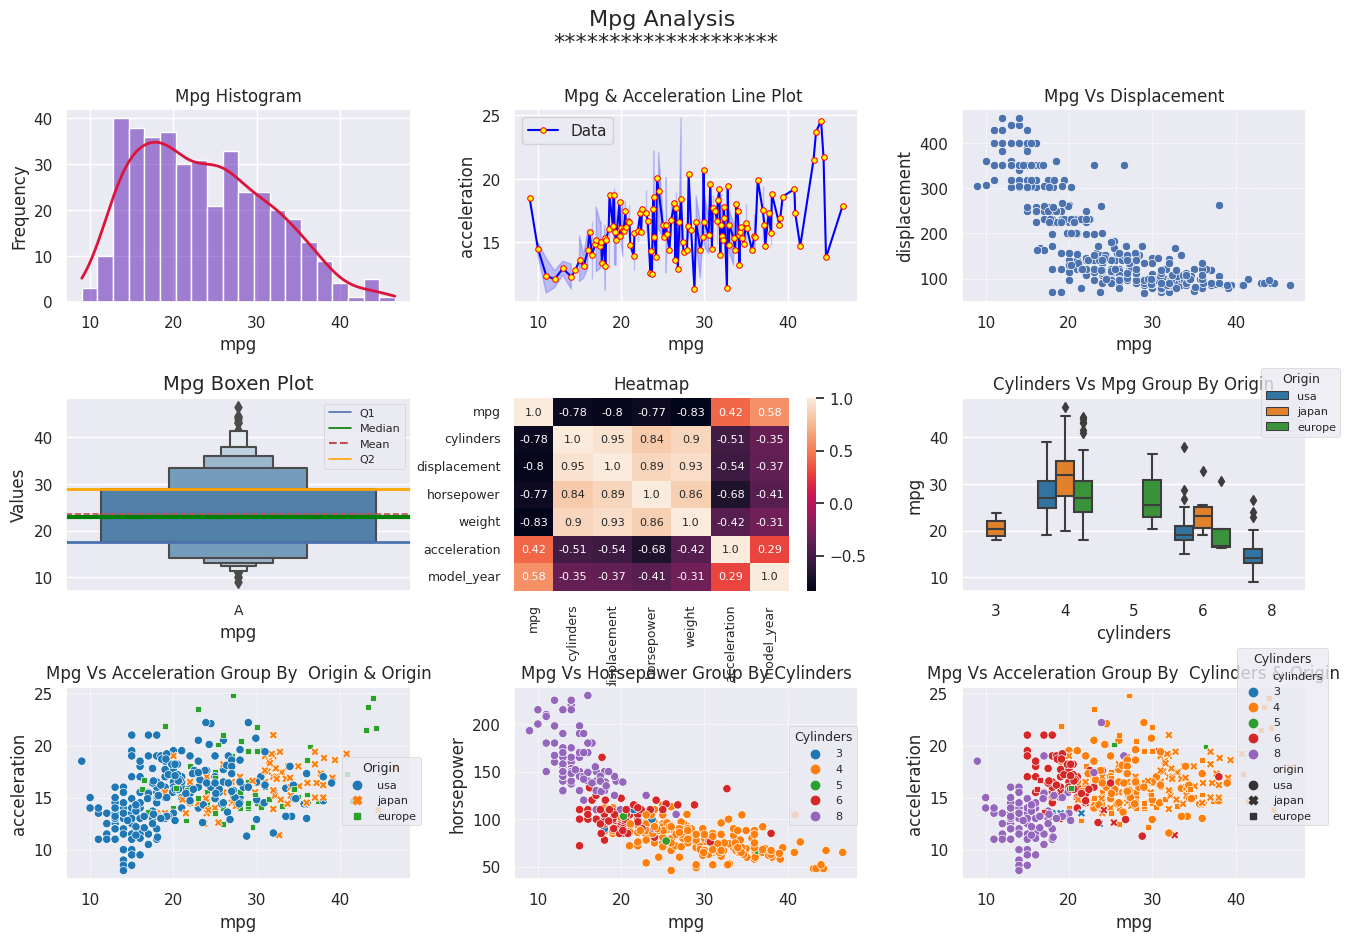

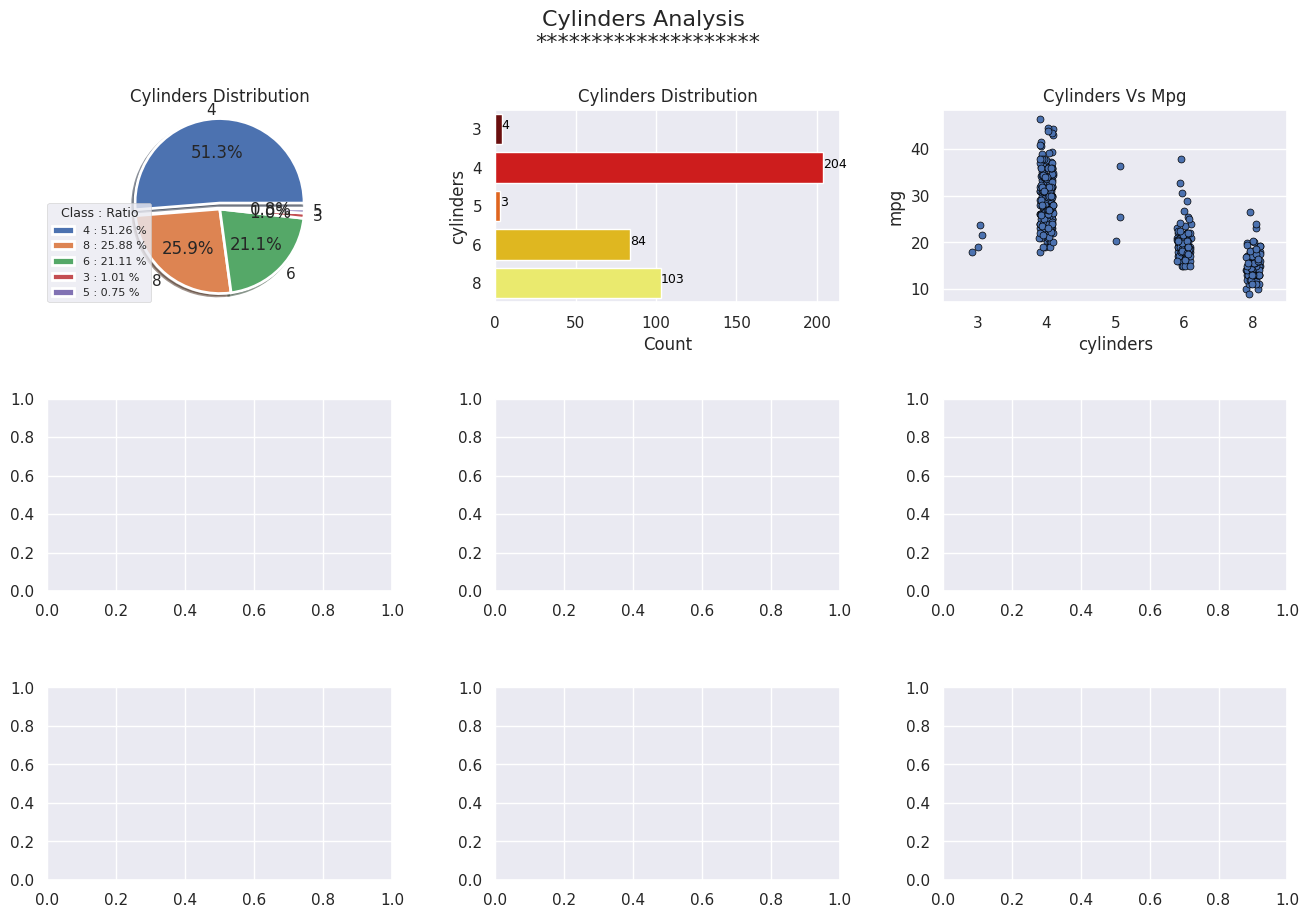

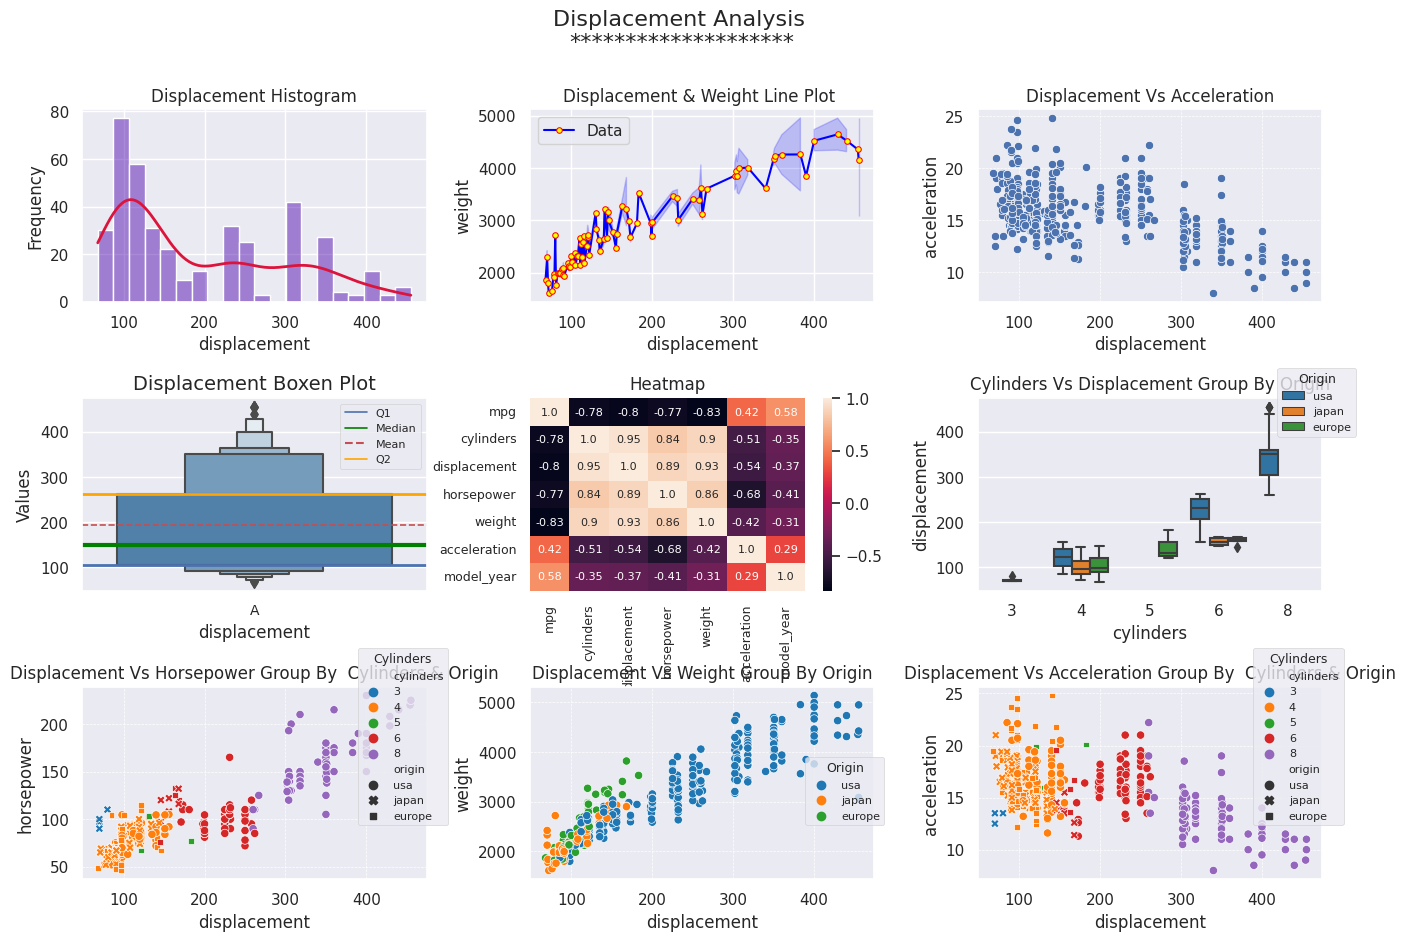

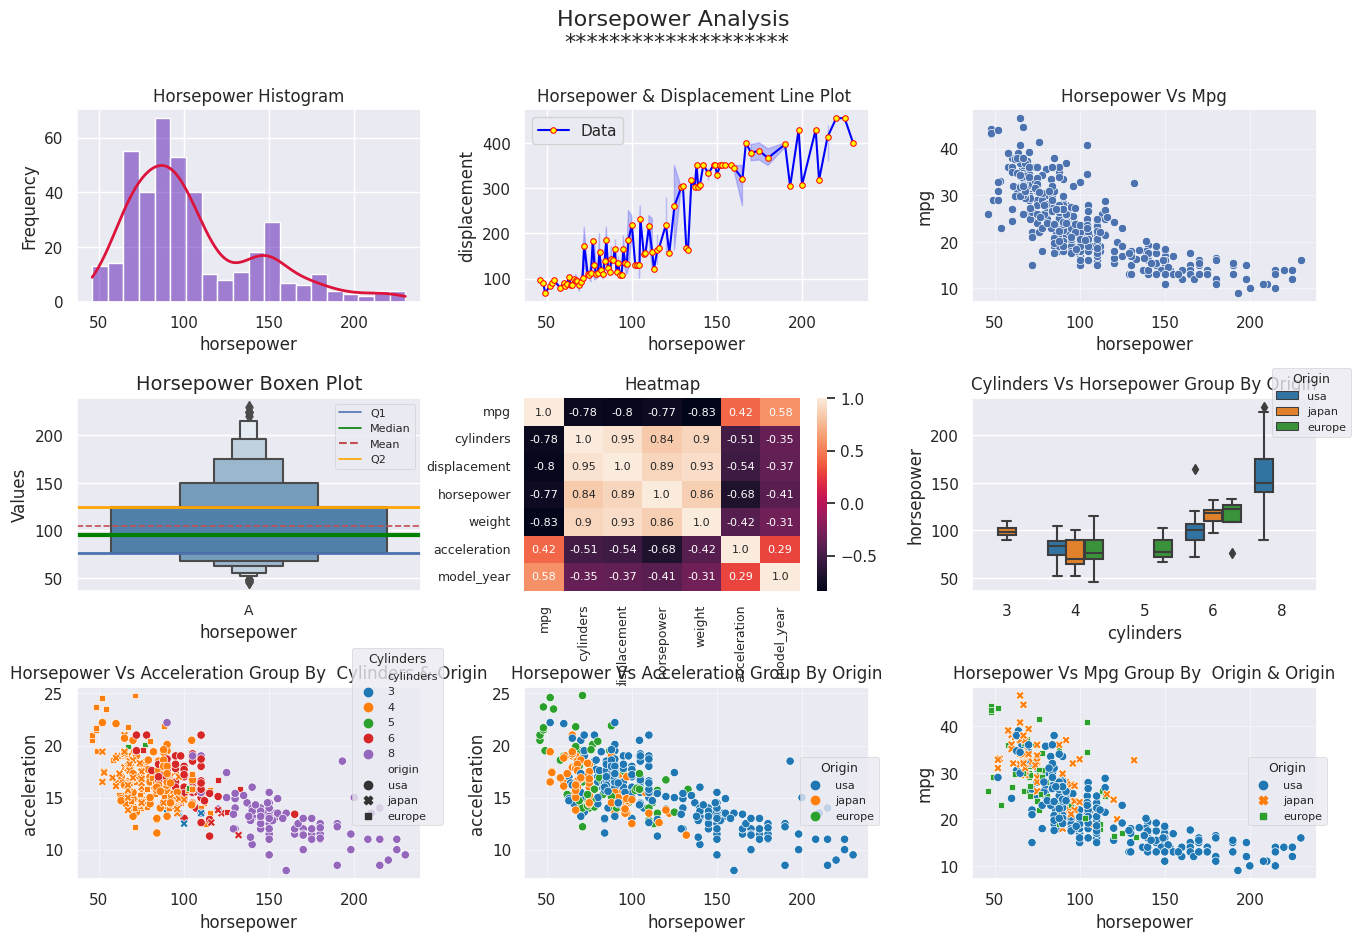

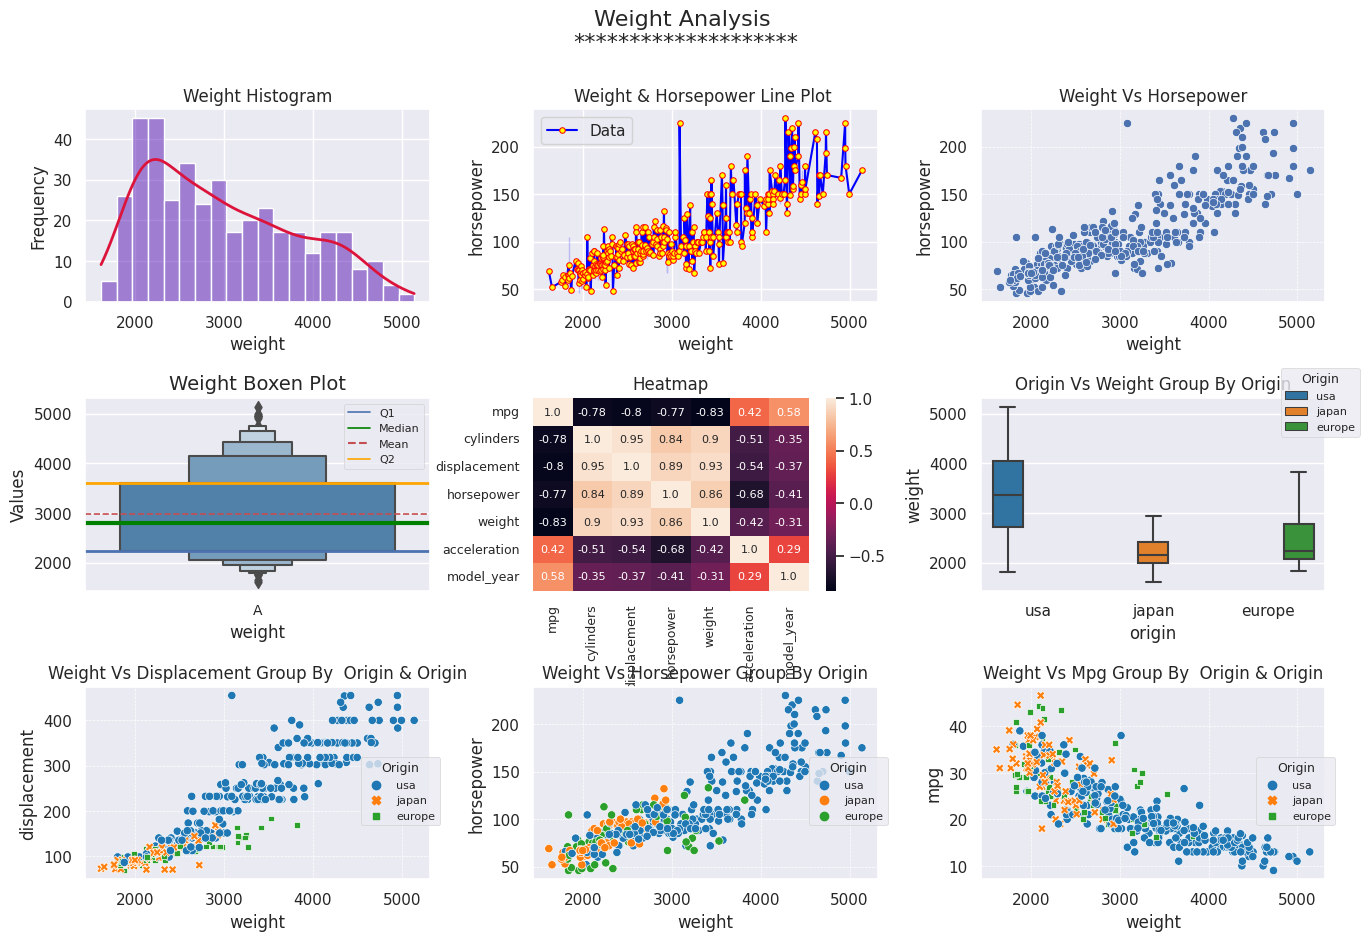

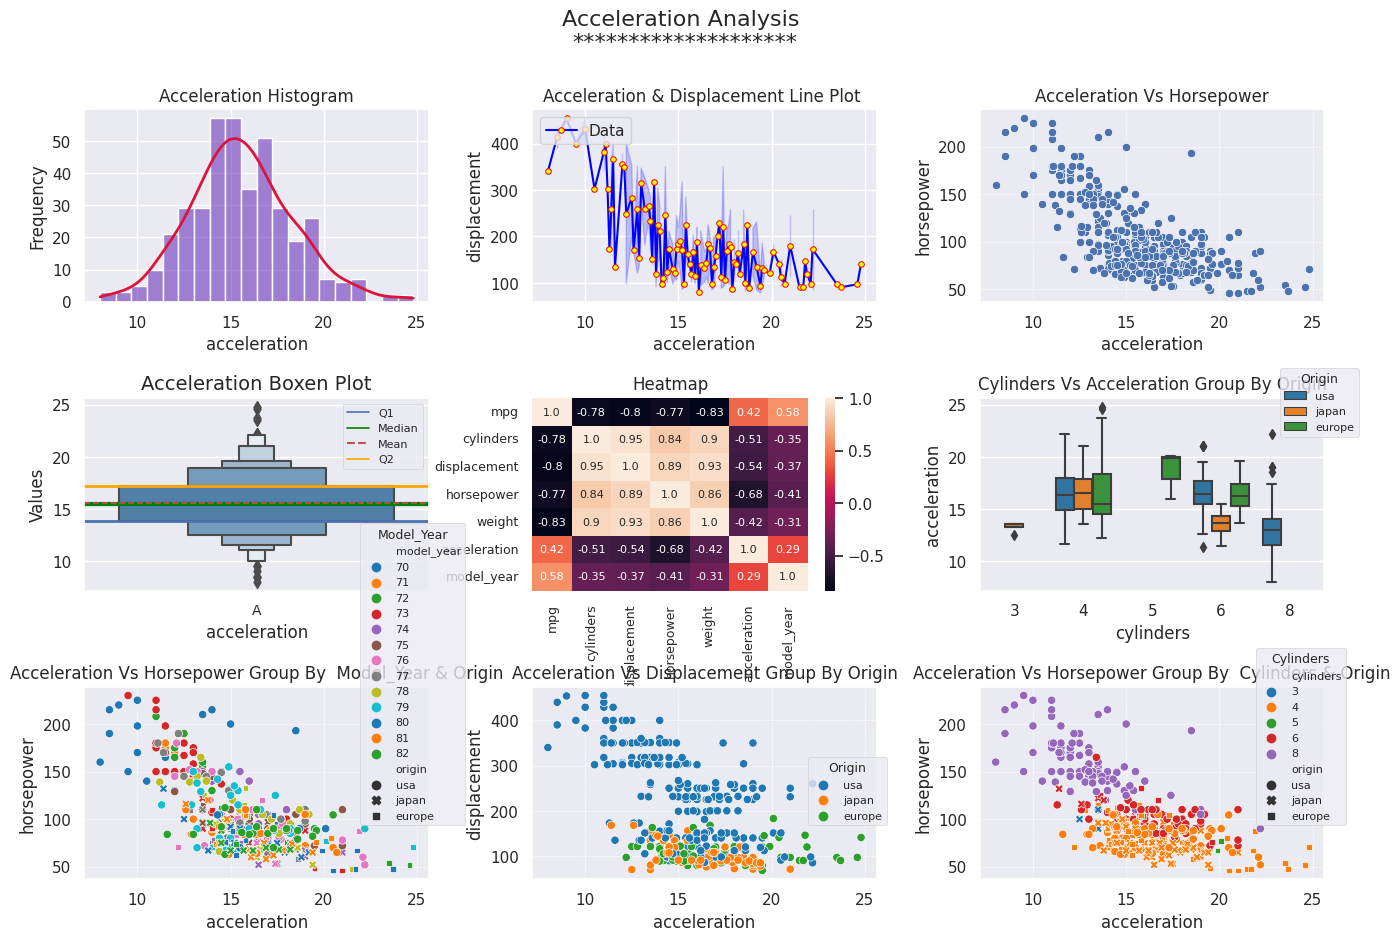

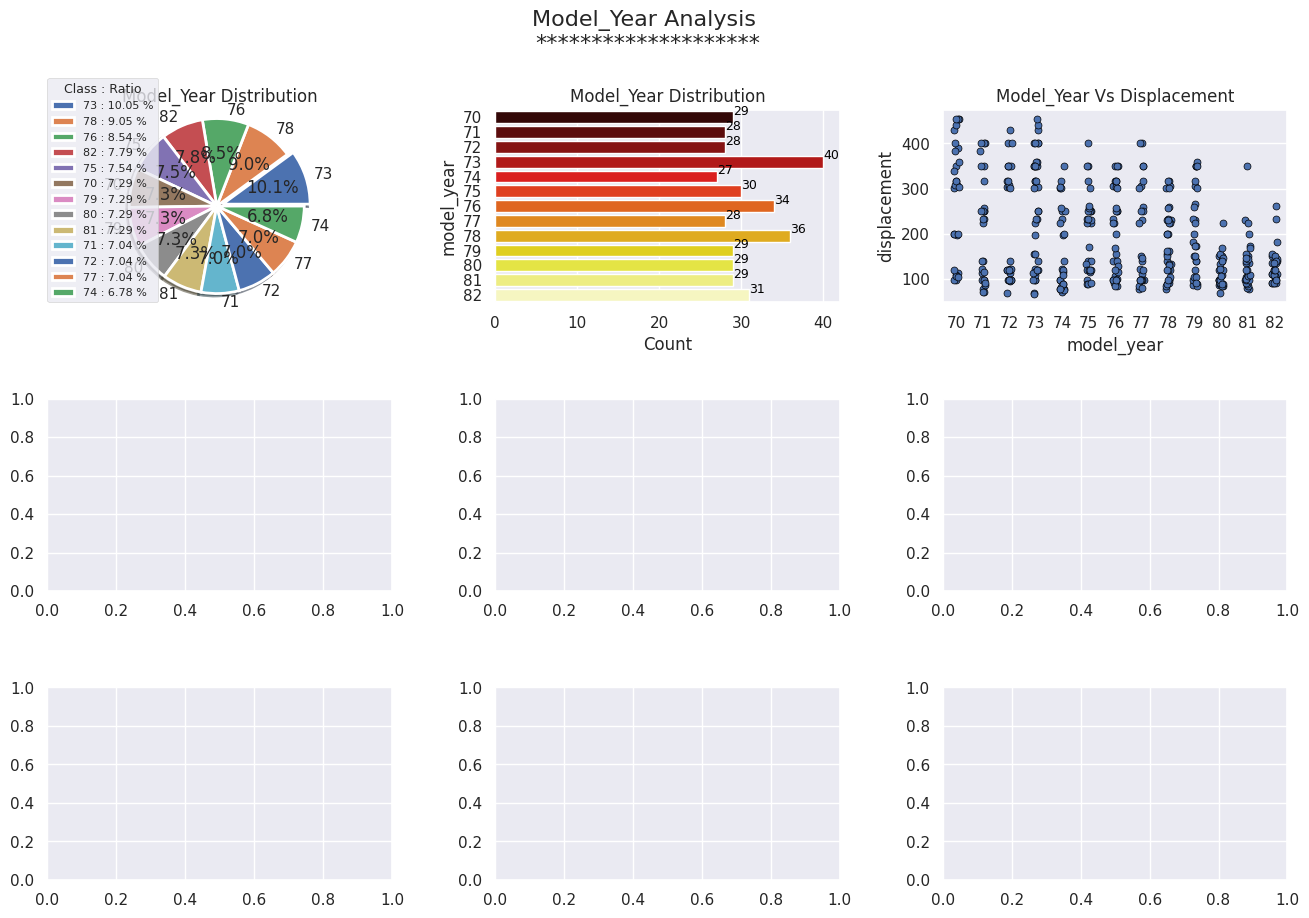

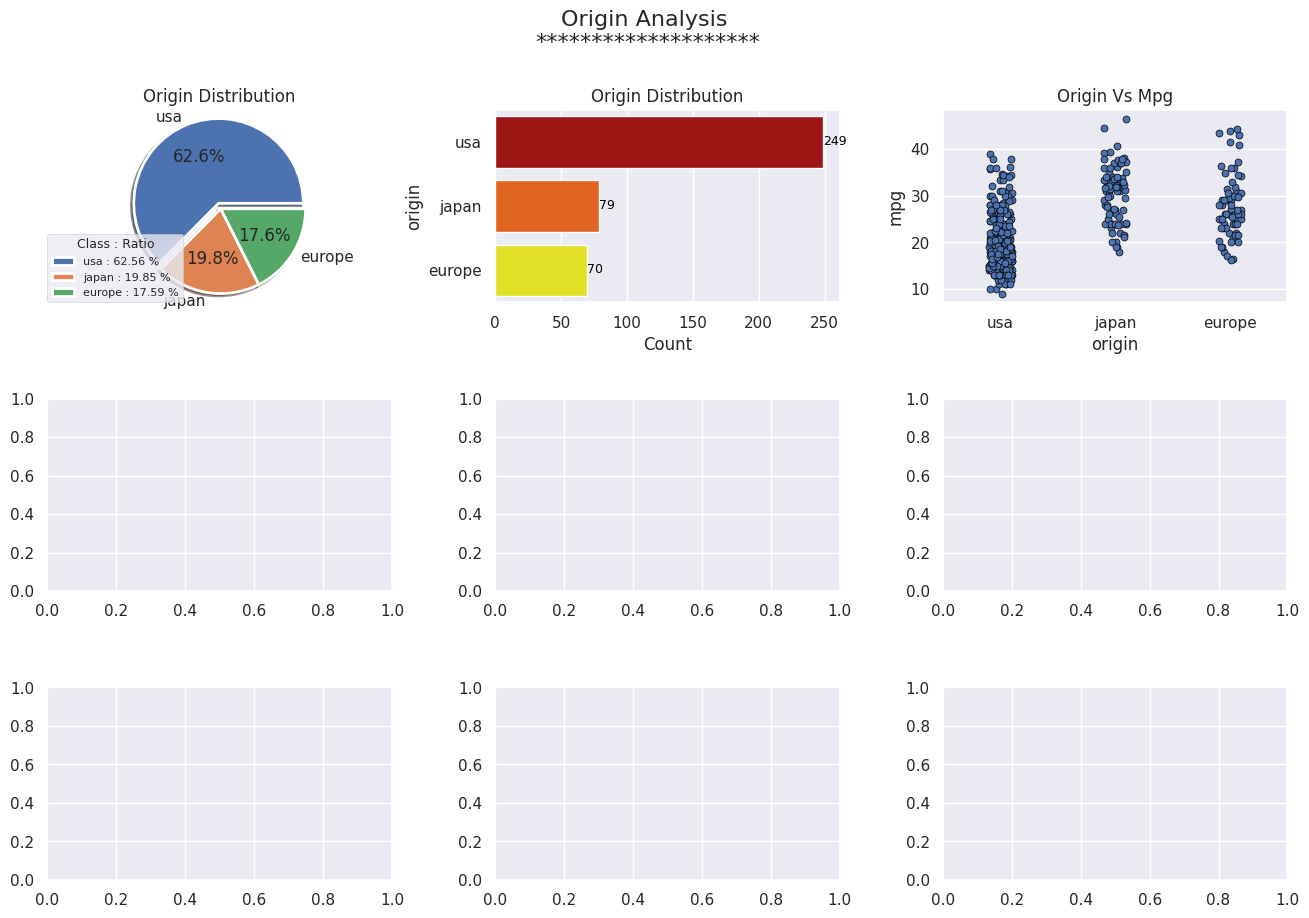

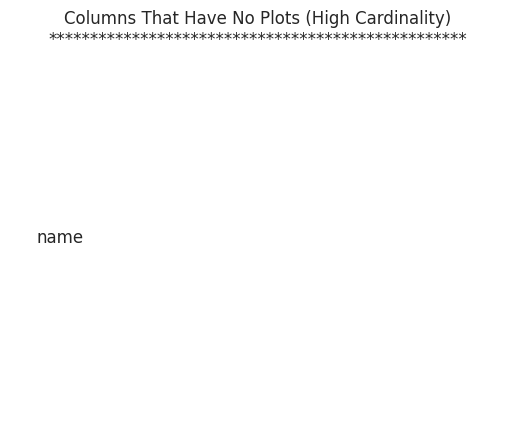

In [ ]:
all_in_one(df)